In [1]:
import numpy as np 
import pandas as pd
import os
import joblib 
import matplotlib
from matplotlib import pyplot as plt
from pandas import DataFrame

In [2]:
df = pd.read_csv('dataset_InP.csv')

In [3]:
df

,doi,in_source,in_amount_mmol,p_source,p_amount_mmol,first_sol,first_sol_amount_ml,second_sol,second_sol_amount_ml,acid,...,other_2,other_2_amount_mmol,total_volume_ml,temp_c,time_min,diameter_nm,abs_nm,emission_nm,date_input,user
0,10.1080/15980316.2012.683537,indium myristate,0.10,tris(trimethylsilyl) phosphine,0.10,octadecene,8.000000,None,0.000000,None,...,None,0.0,8.012,300,30.0,2.3,436,481,6/25/2021,Hao
1,10.1016/j.jcis.2010.12.013,indium chloride,1.81,tris(dimethylamino)phosphine,2.75,toluene,5.000000,None,0.000000,None,...,None,0.0,11.198,180,1440.0,2.3,512,None,6/25/2021,Hao
2,10.1021/j100070a004,chloroindium oxalate,0.88,tris(trimethylsilyl)phosphine,1.40,trioctylphosphine,6.016847,trioctylphosphine oxide,5.555556,None,...,None,0.0,11.573,270,4320.0,2.52,520,None,6/25/2021,Hao
3,10.1021/jp9704731,indium oxalate,2.33,tris(trimethylsilyl)phosphine,3.00,trioctylphosphine,10.950662,trioctylphosphine oxide,1.011111,None,...,None,0.0,11.962,250,4320.0,2.6,517,600,6/25/2021,Hao
4,10.1021/j100019a063,chloroindium oxalate,0.88,tris(trimethylsilyl)phosphine,0.52,trioctylphosphine,6.016847,trioctylphosphine oxide,5.555556,None,...,None,0.0,11.573,270,4320.0,2.6,530,None,6/25/2021,Hao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,10.3762/bjnano.5.135,indium acetate,0.10,phosphine gas,3.00,octadecene,2.000000,None,0.000000,myristic acid,...,None,0.0,2.000,260,15.0,4.5,660,None,8/3/2021,Hao
242,10.3390/ma12142267,indium iodide,0.30,tris(dimethylamino)phosphine,0.66,None,0.000000,None,0.000000,None,...,None,0.0,1.975,180,2.0,None,505,530,8/3/2021,Hao
243,10.1039/c1jm13982g,indium acetate,0.20,phosphine gas,0.19,octadecene,15.000000,None,0.000000,myristic acid,...,None,0.0,15.000,200,15.0,None,548,None,8/3/2021,Hao
244,10.1039/c1jm13982g,indium acetate,0.20,phosphine gas,0.19,octadecene,15.000000,None,0.000000,myristic acid,...,None,0.0,15.000,220,15.0,None,570,None,8/3/2021,Hao


#### indium source

In [4]:
in_source_list = pd.unique(df['in_source'])

print(len(in_source_list))

print(in_source_list)

df['in_source'].value_counts()
df['in_amount_mmol'].value_counts()

12
['indium myristate' 'indium chloride' 'chloroindium oxalate'
 'indium oxalate' 'indium acetate' 'indium trifluoroacetate'
 'indium laurate' 'indium stearate'
 'indium tris(N,N’-diisopropylacetamidinato) ' 'indium iodide'
 'indium bromide' 'indium paltimate']


0.100     39
0.450     26
0.300     21
0.250     20
0.900     18
0.200     17
2.000     16
0.500     15
0.400     11
0.880      9
1.000      9
1.200      6
2.330      6
4.000      5
0.110      4
0.150      4
0.230      3
10.000     2
1.760      2
1.810      2
0.600      2
0.225      1
1.050      1
3.000      1
1.800      1
2.260      1
0.340      1
4.200      1
0.700      1
0.080      1
Name: in_amount_mmol, dtype: int64

#### phosphorous source

In [5]:
p_source_list = pd.unique(df['p_source'])

print(len(p_source_list))

print(p_source_list)

11
['tris(trimethylsilyl) phosphine' 'tris(dimethylamino)phosphine'
 'tris(trimethylsilyl)phosphine' 'phosphorus trichloride'
 'tris(trimethylgermyl)phosphine' 'sodium phosphide' 'phosphine gas'
 'tris(diethylamino)phosphine' 'bis(trimethylsilyl)phosphine'
 'white phosphorus' 'tris(diethylamino)phosphine ']


In [16]:
print(pd.unique(df['other_2_unit']))

['None' 'mmol']


In [9]:
p_source_list = pd.unique(df['p_source'])

print(len(p_source_list))

print(p_source_list)

df['p_source'].value_counts()
df['p_amount_mmol'].value_counts()

11
['tris(trimethylsilyl) phosphine' 'tris(dimethylamino)phosphine'
 'tris(trimethylsilyl)phosphine' 'phosphorus trichloride'
 'tris(trimethylgermyl)phosphine' 'sodium phosphide' 'phosphine gas'
 'tris(diethylamino)phosphine' 'bis(trimethylsilyl)phosphine'
 'white phosphorus' 'tris(diethylamino)phosphine ']


0.050     23
0.100     20
0.125     20
0.200     19
0.300     17
1.600     14
3.200     13
3.000     10
0.150      9
1.000      9
0.080      7
1.380      7
0.500      6
0.190      6
2.000      6
0.400      5
1.400      5
0.250      4
0.800      4
0.450      4
1.200      4
0.607      4
1.620      3
2.750      3
0.600      2
0.000      2
1.926      2
1.040      2
1.930      2
0.499      1
2.070      1
0.660      1
0.230      1
1.300      1
11.300     1
0.120      1
0.520      1
0.350      1
3.840      1
0.299      1
2.480      1
10.000     1
1.500      1
Name: p_amount_mmol, dtype: int64

In [11]:
acid_list = pd.unique(df['acid'])

print(len(acid_list))

print(acid_list)

print(df['acid'].value_counts())
df['acid_amount_mmol'].value_counts()

6
['None' 'palmitic acid' 'stearic acid' 'myristic acid' 'lauric acid'
 'oleic acid']
None             131
myristic acid     69
palmitic acid     16
stearic acid      13
oleic acid        11
lauric acid        6
Name: acid, dtype: int64


0.000     131
0.300      32
0.600       9
0.450       9
0.700       8
1.700       7
1.500       6
7.700       5
7.250       5
8.200       5
3.600       4
1.350       3
12.000      3
1.800       2
14.500      2
1.450       2
0.248       1
2.100       1
1.000       1
0.268       1
0.100       1
0.288       1
9.000       1
0.010       1
0.340       1
3.000       1
0.910       1
0.308       1
0.260       1
Name: acid_amount_mmol, dtype: int64

In [13]:
sol1_list = pd.unique(df['first_sol'])

print(len(sol1_list))

print(sol1_list)

print(df['first_sol'].value_counts())
df['first_sol_amount_ml'].value_counts()

8
['octadecene' 'toluene' 'trioctylphosphine' 'trioctylphosphine oxide'
 '4-ethylpyridine' 'dimethylformamide' 'None' 'mesitylene']
octadecene                 162
None                        62
trioctylphosphine           14
toluene                      3
mesitylene                   2
4-ethylpyridine              1
trioctylphosphine oxide      1
dimethylformamide            1
Name: first_sol, dtype: int64


0.000000      62
6.500000      30
7.600000      26
44.000000     24
15.000000     10
10.000000      9
1.000000       7
11.000000      6
4.000000       6
34.000000      6
10.950662      6
5.000000       6
7.000000       5
3.000000       5
6.750000       5
2.000000       4
12.000000      4
6.016847       3
100.000000     3
8.000000       2
9.000000       2
6.000000       2
2.406739       2
90.000000      1
8.500000       1
8.620000       1
40.000000      1
0.222222       1
10.140000      1
45.000000      1
75.000000      1
50.000000      1
16.000000      1
17.000000      1
Name: first_sol_amount_ml, dtype: int64

In [15]:
other_list = pd.unique(df['other_1'])

print(len(other_list))

print(other_list)

print(df['other_1'].value_counts())
df['other_1_amount_mmol'].value_counts()

11
['zinc stearate' 'None' 'acetic acid' 'zinc chloride' 'zinc undecylenate'
 'tetrabutylammonium myristate' 'zinc iodide' 'zinc acetate' 'zinc oleate'
 'zinc octanoate' 'zinc bromide']
None                            154
zinc chloride                    54
zinc oleate                       8
zinc octanoate                    7
zinc undecylenate                 7
zinc iodide                       6
zinc bromide                      4
zinc stearate                     3
acetic acid                       1
tetrabutylammonium myristate      1
zinc acetate                      1
Name: other_1, dtype: int64


0.00    154
2.20     30
4.40     14
2.00      9
0.10      7
1.47      5
1.10      5
0.50      4
0.90      4
0.30      3
1.32      2
1.20      2
0.13      1
0.73      1
0.01      1
0.24      1
0.60      1
0.08      1
1.50      1
Name: other_1_amount_mmol, dtype: int64

In [16]:
temp = pd.unique(df['temp_c'])

print(len(temp))

print(temp)

print(df['temp_c'].value_counts())


22
[300 180 270 250 210 260 280 290 130 160 245 230 178 150 170 305 200 220
 285 140 240 310]
180    41
270    40
178    18
150    17
220    15
260    13
300    13
230    13
290    10
280     9
210     9
200     7
240     6
250     6
130     5
305     5
170     4
285     4
245     4
160     4
140     2
310     1
Name: temp_c, dtype: int64


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=df["temp_c"], 
                    palette=sns.color_palette("rocket", as_cmap=True))

TypeError: 'ListedColormap' object is not iterable

AxisError: axis 1 is out of bounds for array of dimension 1

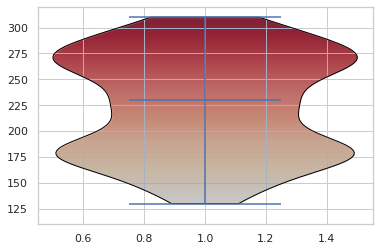

In [79]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


x = df["temp_c"]

fig, ax = plt.subplots()
violins = ax.violinplot(x, vert=True, showmedians=True, widths=1,showextrema=True)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

Nx,Ny=100,400
imgArr = np.tile(np.linspace(0,1,Ny), (Nx,1)).T
cmap = 'OrRd'

for violin in violins['bodies']:
    path = Path(violin.get_paths()[0].vertices)
    patch = PathPatch(path, facecolor='none', edgecolor='black')
    ax.add_patch(patch)
    img = ax.imshow(imgArr, origin="lower", extent=[xmin,xmax,110,320], aspect="auto",
                    cmap=cmap,
                    clip_path=patch)

quartile1, medians, quartile3 = np.percentile(df['temp_c'], [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)